- Author: Predict This

Install in specific environment

- conda install -c conda-forge wordcloud=1.2.1 
- conda install -c conda-forge textblob
- python -m textblob.download_corpora lite

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output

from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.util import ngrams
import graphlab

- Working Code for creating dropdown

In [40]:
# try:
#     # for Python2
#     from Tkinter import *   ## notice capitalized T in Tkinter 
# except ImportError:
#     # for Python3
#     from tkinter import *   ## notice lowercase 't' in tkinter here

# from Tkinter import *
# import Tkinter as ttk
# from ttk import *
 
# root = Tk()
# root.title("Tk dropdown example")
 
# # Add a grid
# mainframe = Frame(root)
# mainframe.grid(column=0,row=0, sticky=(N,W,E,S) )
# mainframe.columnconfigure(0, weight = 1)
# mainframe.rowconfigure(0, weight = 1)
# mainframe.pack(pady = 100, padx = 100)
 
# # Create a Tkinter variable
# tkvar = StringVar(root)
 
# # Dictionary with options
# choices = { 'Pizza','Lasagne','Fries','Fish','Potatoe'}
# tkvar.set('Pizza') # set the default option
 
# popupMenu = OptionMenu(mainframe, tkvar, *choices)
# Label(mainframe, text="Choose a dish").grid(row = 1, column = 1)
# popupMenu.grid(row = 2, column =1)
 
# # on change dropdown value
# def change_dropdown(*args):
#     print( tkvar.get() )
 
# # link function to change dropdown
# tkvar.trace('w', change_dropdown)
 
#root.mainloop()


- Working code for lemmatization

In [41]:
# from nltk.stem import WordNetLemmatizer
# wordnet_lemmatizer = WordNetLemmatizer()
# #wordnet_lemmatizer.lemmatize("wasn't")
# from nltk.corpus import wordnet
# wordnet.lemma("wasn't that good")

In [42]:
trainingData=pd.read_csv('Hotel_Reviews.csv')
#trainingData.head(1)

- Selecting only the relavant coumns from reviews dataset

In [43]:
reviewData = trainingData[['Hotel_Name','Negative_Review','Positive_Review','Average_Score']]

In [44]:
train=reviewData

In [45]:
train['Hotel_Name'] = [(x.replace(' ','')).lower() for x in train['Hotel_Name']]

C:\Users\sriha\Anaconda3\Anaconda\envs\dato-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


- selecting rows with specific hotel name and filtering unwanted rows
- Taking input from user

In [46]:
if hasattr(__builtins__, 'raw_input'):
    input=raw_input
hotelNameEntered = input("Enter Hotel Name : ")
hotelName=hotelNameEntered.replace(" ", "")
hotelName=hotelName.lower()

Enter Hotel Name : hotel arena


- Selecting rows with particular hotel name

In [47]:
train_pos = train[ train['Hotel_Name'] == hotelName ]
train_pos = train_pos[train_pos['Positive_Review'] != 'No Positive']
train_pos = train_pos['Positive_Review']

train_neg = train[ train['Hotel_Name'] == hotelName]
train_neg = train_neg[train_neg['Negative_Review'] != 'No Negative']
train_neg = train_neg['Negative_Review']



- selecting rows with all hotels and filtering unwanted rows

In [48]:
train_pos1 = train[train['Positive_Review'] != 'No Positive']
train_pos1 = train_pos1['Positive_Review']
train_neg1 = train[train['Negative_Review'] != 'No Negative']
train_neg1 = train_neg1['Negative_Review']

- Code to filter out positive and negative reviews from textblob


- code to find and update the positive reviews from the negative reviews in dataset

In [49]:
updatedPositiveComments = []
updatedNegativeComments = []

In [50]:
    print("Positive Train-Hotel Specific")
    print(" ")
    positiveCount=0;
    negativeCount=0;
    neutralCount=0;
    unclassCount=0;
    totalCount=0;
    for review in train_pos:
        cleaned_word = " ".join([word.lower() for word in review.split()])
        #cleaned_word = " ".join([word for word in cleaned_word.split() if not word in stopwords])
        analysis = TextBlob(cleaned_word)
        if analysis.sentiment.polarity > 0:
            updatedPositiveComments.append(review);
            positiveCount=positiveCount+1;
        if analysis.sentiment.polarity == 0:
            updatedPositiveComments.append(review);
            neutralCount=neutralCount+1;
        if analysis.sentiment.polarity < 0:
            updatedNegativeComments.append(review);
            negativeCount=negativeCount+1;
#             print("Negative predictions in positive review")
#             print(review)
#             print("Index")
#             print(totalCount)
#             print("Index Text")
#             print(train_pos[totalCount-1])
#             print(" sub and polar ")
#             print(analysis.sentiment.subjectivity)
#             print(analysis.sentiment.polarity)
#             print("  ") 
#         if analysis.sentiment.polarity < 0 :
#             unclassCount=unclassCount+1;
#             print("unclassified predictions in positive review")
#             print(review)
#             print("  ") 
        totalCount=totalCount+1;
   
    print("Total reviews : ");
    print(totalCount);
    print("Total Pos reviews : ");
    print(positiveCount);
    print("Total Neu reviews : ");
    print(neutralCount);
    print("Total Neg reviews : ");
    print(negativeCount);
    print("  ")   
    
    
   
        

Positive Train-Hotel Specific
 
Total reviews : 
382
Total Pos reviews : 
343
Total Neu reviews : 
33
Total Neg reviews : 
6
  


- code to find and update the negative reviews from the positive reviews in dataset

In [51]:
    print("Negative Train -Hotel Specific  ")    
    
    print("  ")
    positiveCount=0;
    negativeCount=0;
    neutralCount=0;
    totalCount=0;
    unClassCount=0;
#     for review in train_neg:
#         temp=review.split(".")
#         for temp1 in temp:
#             sentences.append(temp1);    
    for review in train_neg:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity >= 0.5 and analysis.sentiment.subjectivity >= 0.4 :
            positiveCount=positiveCount+1;
            updatedPositiveComments.append(review);
#             print("Positive predictions in negative reviews")
#             print(review)
#             print(" sub and polar ")
#             print(analysis.sentiment.subjectivity)
#             print(analysis.sentiment.polarity)
#             print("  ") 
        if analysis.sentiment.polarity == 0:
            updatedNegativeComments.append(review);
            neutralCount=neutralCount+1;
        if analysis.sentiment.polarity <= 0.2 and analysis.sentiment.polarity != 0 :
            negativeCount=negativeCount+1;
            updatedNegativeComments.append(review);
#             if analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.2:
#                 print("classified negative in negative reviews")
#                 print(review)
#                 print(" sub and polar ")
#                 print(analysis.sentiment.subjectivity)
#                 print(analysis.sentiment.polarity)
#                 print(" ")
        if analysis.sentiment.polarity < 0.5 and analysis.sentiment.polarity > 0.2 :
            unClassCount=unClassCount+1;
            updatedNegativeComments.append(review);
            #print("unclassified predictions in negative reviews")
            #print(review)
            #print("  ")
            #print(" sub and polar ")
            #print(analysis.sentiment.subjectivity)
            #print(analysis.sentiment.polarity)
            #print("  ")
        totalCount=totalCount+1;
    print("Total reviews : ");
    print(totalCount);
    print("Total Pos reviews : ");
    print(positiveCount);
    print("Total Neu reviews : ");
    print(neutralCount);
    print("Total Neg reviews : ");
    print(negativeCount);
    print("  ") 
    print("Total Unclassified reviews : ");
    print(unClassCount);
    print("  ") 

Negative Train -Hotel Specific  
  
Total reviews : 
314
Total Pos reviews : 
7
Total Neu reviews : 
50
Total Neg reviews : 
218
  
Total Unclassified reviews : 
38
  


In [52]:
print("Total updated positive reviews : ");
print(len(updatedPositiveComments));
print("Total updated negative reviews : ");
print(len(updatedNegativeComments));

Total updated positive reviews : 
383
Total updated negative reviews : 
312


- Setting stopwords and positive and negative adjectives

In [53]:
stopwords = set(STOPWORDS)
stopwords.remove("not")
stopwords.add("hotel")
stopwords.add("room")
stopwords.add("rooms")
stopwords.add("s")

In [54]:
# positiveAdjectives=['beautiful', 'gorgeous','superb','great','fantastic','thrilled','huge','enormous']
# negativeAdjectives=['ugly', 'awful','filthy','terrible','angry','furious','scared','terrified','tiny']

- Working code for Tf-IDF

In [55]:
#     cvec = TfidfVectorizer(stop_words= stopwords, min_df=0.0025, max_df=.1, ngram_range=(1,2))
#     cvec.fit(data)
#     cvec_counts = cvec.transform(data)
    
    
#     transformer = TfidfTransformer()
#     transformed_weights = transformer.fit_transform(cvec_counts)
#     transformed_weights    
#     occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
#     counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
#     print(counts_df.sort_values(by='occurrences', ascending=False).head(20))
    
#     weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
#     weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
#     print(weights_df.sort_values(by='weight', ascending=False).head(20)) 
   
    
#     wordcloud = WordCloud(stopwords=stopwords,
#                       background_color=color,collocations=True,
#                       width=2500,
#                       height=2000
#                      ).generate(stemmedWord)


- Function for wordcloud Generation

Hotel Specific Positive words - Hotel Name : hotel arena


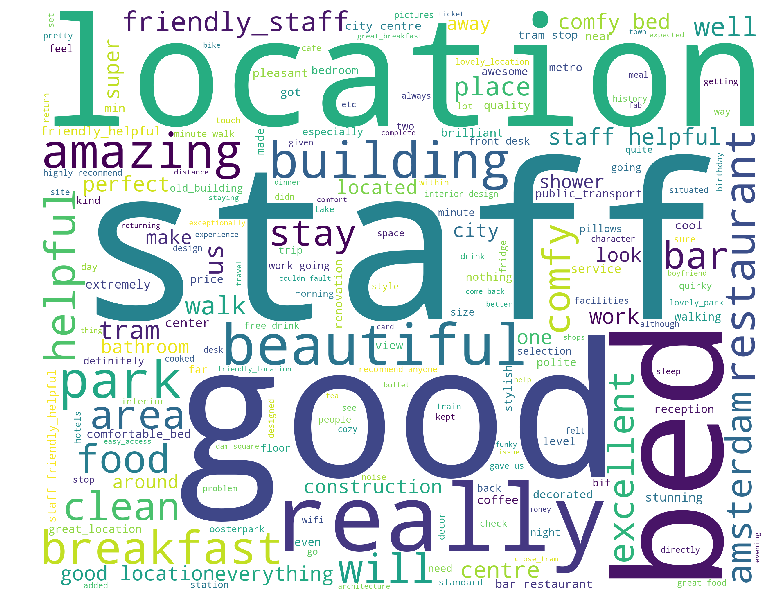

Hotel specific Negative words - Hotel Name : hotel arena


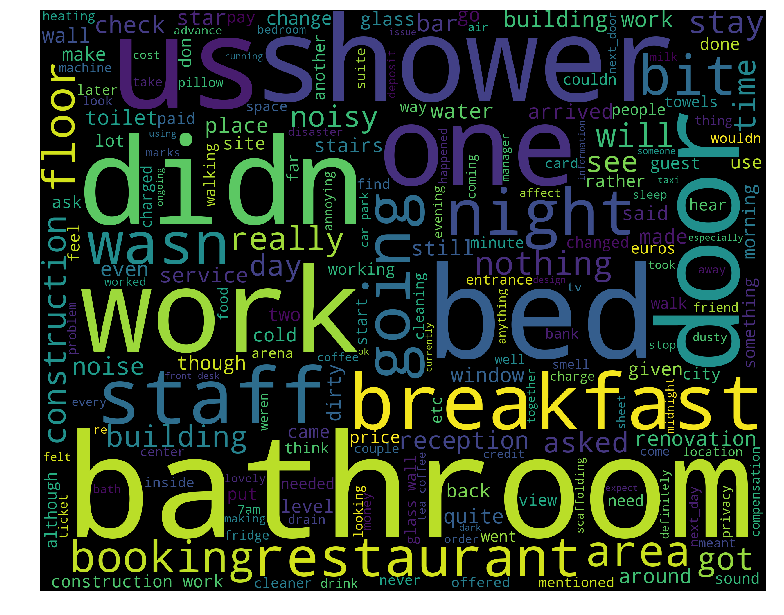

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer


def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word.lower() for word in words.split()])
    cleaned_word = " ".join([word for word in cleaned_word.split() if not word in stopwords])
    porter=PorterStemmer()
    stemmedWord = " ".join([porter.stem(word) for word in cleaned_word.split()])
    #stemmed = [porter.stem(word) for word in cleaned_word.split()]
    adjectives = set()
    nouns=set()
    words = nltk.tokenize.word_tokenize(cleaned_word)
    # each sentence is either a list of words or a list of (word, POS tag) tuples
    for word, pos in nltk.pos_tag(words): # remove the call to nltk.pos_tag if `sentence` is a list of tuples as described above
        if pos in ['JJ', 'JJS','JJR']: # feel free to add any other noun tags
            adjectives.add(word)
        if pos in ['NN']:
            nouns.add(word)
    resultAdjectives=adjectives-stopwords-nouns
    #words = nltk.tokenize.word_tokenize(stemmedWord)
    newWords='';
    for word in words:
        if(word in resultAdjectives):
            word=word+'_';
        newWords=newWords+word+' ';
    replacedWord=newWords.replace("_ ", "_")
    final_word = " ".join([word for word in replacedWord.split()])
    fdist = FreqDist(words)
    #print(fdist.most_common(100))
    thefile = open('FrequecyWords.txt', 'w')
    for item in fdist.most_common(50):
        print>>thefile, item

    cleaned_wordFromStem = " ".join([word for word in words if not word in stopwords])
    wordcloud = WordCloud(stopwords=stopwords,
                      background_color=color,collocations=True,
                      width=2500,
                      height=2000
                     ).generate(final_word)
    
#     wc= WordCloud().generate(result);
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
print("Hotel Specific Positive words - Hotel Name : "+ hotelNameEntered)
wordcloud_draw(updatedPositiveComments,'white')
print("Hotel specific Negative words - Hotel Name : " + hotelNameEntered)
wordcloud_draw(updatedNegativeComments)
# wordcloud_draw(train_neg) 
# print("WordCloud - Total Data Positive words")
# wordcloud_draw(train_pos1,'white')
# print("WordCloud - Total Data Negative words")
# wordcloud_draw(train_neg1)

- Module for finding percentile and analysing best performing hotels

In [26]:
groupedData=trainingData.groupby(['Hotel_Address']).mean()

In [27]:

#train_data = graphlab.SFrame(trainingData)

# uniquehotels =hotels.groupby(key_columns='Hotel_Name', operations={
# })


In [28]:
#popularity_model = graphlab.popularity_recommender.create(hotels, Hotel_Address='Hotel_Address', Average_Score='Average_Score',Tags='Tags',lng='lng',lat='lat', target='Hotel_Name')

In [29]:
# popularity_recomm = popularity_model.recommend('Hotel Arena',k=5)
# popularity_recomm.print_rows(num_rows=5)

In [30]:
betterPerforming99Range=groupedData['Average_Score'].quantile(0.99)

In [31]:
betterPerformingHotelsPositive = train[train['Average_Score'] > betterPerforming99Range]
betterPerformingHotelsNegative = train[train['Average_Score'] > betterPerforming99Range]

In [32]:
betterPerformingHotelsPositive = betterPerformingHotelsPositive[betterPerformingHotelsPositive['Positive_Review'] != 'No Positive']
wordData_BetterPerform_Positive = betterPerformingHotelsPositive['Positive_Review']
betterPerformingHotelsNegative = betterPerformingHotelsNegative[betterPerformingHotelsNegative['Negative_Review'] != 'No Negative']
wordData_BetterPerform_Negtive = betterPerformingHotelsNegative['Negative_Review']

- Worcloud generation for top performing hotels

WordCloud - Top Performing Hotel Data Positive words


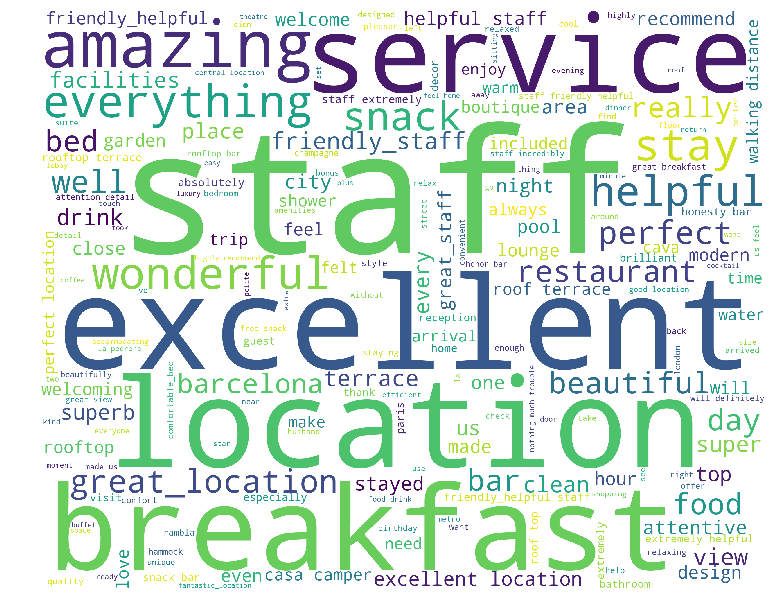

WordCloud - Top Performing Hotel Data Negative words


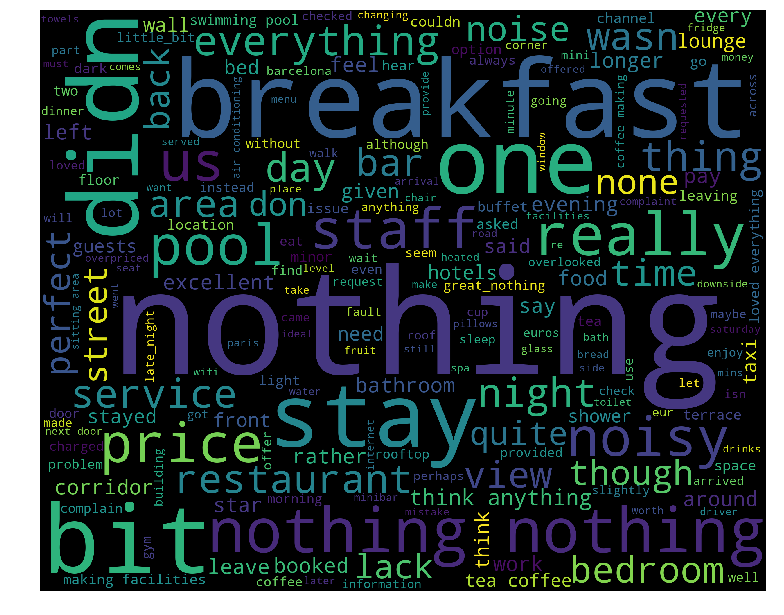

In [33]:
print("WordCloud - Top Performing Hotel Data Positive words")
wordcloud_draw(wordData_BetterPerform_Positive,'white')
print("WordCloud - Top Performing Hotel Data Negative words")
wordcloud_draw(wordData_BetterPerform_Negtive)

- Code module to find similar hotels

In [34]:
hotels=trainingData[['Hotel_Name','Average_Score','lat','lng']]
hotels=hotels.drop_duplicates('Hotel_Name')
#print(hotels)
hotels['Hotel_Name'] = [(x.replace(' ','')).lower() for x in hotels['Hotel_Name']]
hotelLat=  hotels.loc[hotels['Hotel_Name'] == hotelName]['lat']
hotelLng=  hotels.loc[hotels['Hotel_Name'] == hotelName]['lng']
#print(hotels.iloc[0]['lat'])
rowCount=hotels.size/hotels.iloc[0].size

- Code to find distance based on latitude and longitude

In [35]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0
my_list = []
lat1 = radians(hotelLat)
lon1 = radians(hotelLng)
for x in range(0, rowCount):
    lat2 = radians(hotels.iloc[x]['lat'])
    lon2 = radians(hotels.iloc[x]['lng'])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = round(R * c,2)
    my_list.append(distance)


In [36]:
# print(len(my_list))
# df = pd.DataFrame(np.array(my_list))
# df.columns = [
#   'Distance'
# ]
# df1 = pd.DataFrame(np.array(hotels['Average_Score'].tolist()))
# df1.columns = [
#   'avgscore'
# ]

# dataFr = pd.DataFrame({'distance': my_list,
#                      'Avgscore': hotels['Average_Score'].tolist(),'HotelName':hotels['Hotel_Name'].tolist() })

- Updated Dataframe with distance and average hotel review score

In [37]:


dataFr = pd.DataFrame({'distance': my_list,
                     'Avgscore': hotels['Average_Score'].tolist() })

- Finding cosine similarity and taking the top similar hotels

In [38]:
from scipy import spatial
initList=dataFr.loc[dataFr['distance'] == 0].values.tolist()
CosList=[]
indexList=[]
for x in range(0, rowCount):
    tempList = dataFr.iloc[x].values.tolist()
    result = 1 - spatial.distance.cosine(initList, tempList)
    CosList.append(result)
    indexList.append(x)

resultDf=pd.DataFrame({'Id':indexList,'distance': my_list,
                     'Avgscore': hotels['Average_Score'].tolist(),'CosineSim':CosList })

resultDf=resultDf.sort_values(by=['CosineSim'],ascending=False)
#print(resultDf)
posList=[]
negList=[]
for x in range(1, 5):
    hName= hotels.iloc[resultDf['Id'][1]]['Hotel_Name']
    train_pos = train[ train['Hotel_Name'] == hName ]
    train_pos = train_pos[train_pos['Positive_Review'] != 'No Positive']
    train_pos = train_pos['Positive_Review']
    tempList=train_pos.tolist()
    length=len(tempList)
    for y in range(0,length):
        posList.append(tempList[y])
    train_neg = train[ train['Hotel_Name'] == hName]
    train_neg = train_neg[train_neg['Negative_Review'] != 'No Negative']
    train_neg = train_neg['Negative_Review']
    tempList1=train_neg.tolist()
    length=len(tempList1)
    for y in range(0,length):
        negList.append(tempList1[y])
        
pos = np.asarray(posList)
neg = np.asarray(negList)


- Generating wordcloud based on the similar hotels positive and negative reviews

In [ ]:
print("WordCloud - Similar Top Performing Hotel Data Positive words")
wordcloud_draw(pos,'white')
print("WordCloud - Similar Top Performing Hotel Data Negative words")
wordcloud_draw(neg)

In [ ]:

# bigdata = pd.DataFrame(columns=['Distance', 'AverageScore'])

# # for x in range(0, rowCount):
# #     bigdata.loc[x] = [df['Distance'][x],hotels['Average_Score'][x]]
# print(bigdata)

In [ ]:
# for x in range(0, rowCount):
#     bigdata.insert(x, 'Distance', df['Distance'][x])
#     bigdata.insert(x, 'AverageScore', hotels['Average_Score'][x])
    
# print(bigdata)

# bigdata['Distance'] = df['Distance']
# bigdata['AverageScore']=df1['AverageScore']

In [ ]:
#print(bigdata)

In [ ]:
# uniquehotels=hotels.groupby(['Hotel_Address']).mean()
# reqdata=uniquehotels[['Average_Score','lat','lng']]

In [ ]:
# from sklearn.metrics.pairwise import cosine_similarity
# print(cosine_similarity(reqdata[0], reqdata[1], dense_output=True))